<a href="https://colab.research.google.com/github/danielamll/PIA_RED_NEURONALES/blob/main/PIAREDESINCEPTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INSTALACIÓN DE KAGGLE Y DESCARGA DE DATASET

In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Mon May 16 19:23:30 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [15]:
! pip install -q kaggle

In [16]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [17]:
! cp kaggle.json ~/.kaggle/

In [18]:
! chmod 600 ~/.kaggle/kaggle.json

In [19]:
! kaggle datasets list

ref                                                                            title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
datasets/muratkokludataset/date-fruit-datasets                                 Date Fruit Datasets                              408KB  2022-04-03 09:25:39           7431       1004  0.9375           
datasets/mdmahmudulhasansuzan/students-adaptability-level-in-online-education  Students Adaptability Level in Online Education    6KB  2022-04-16 04:46:28           4891        127  1.0              
datasets/muratkokludataset/rice-image-dataset                                  Rice Image Dataset                               219MB  2022-04-03 02:12:00           1419        829  0.875            


In [20]:
! kaggle datasets download "aryashah2k/breast-ultrasound-images-dataset" --force

100% 195M/195M [00:01<00:00, 165MB/s]
100% 195M/195M [00:01<00:00, 138MB/s]


In [21]:
! unzip 'breast-ultrasound-images-dataset'

Archive:  breast-ultrasound-images-dataset.zip
  inflating: Dataset_BUSI_with_GT/benign/benign (1).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (1)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (10).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (10)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (100).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (100)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (100)_mask_1.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (101).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (101)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (102).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (102)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (103).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (103)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (104).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (104)_mask.png  
  inflating: Data

# IMPORTAR LIBRERIAS


In [22]:
import numpy as np
import pandas as pd
import os, glob

In [23]:

from tensorflow import keras
import tensorflow as tf
import cv2
from tensorflow.keras.preprocessing.image import load_img ,img_to_array
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D,AveragePooling2D,BatchNormalization
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.layers import Flatten,Dropout,SpatialDropout2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam

from tensorflow.keras import layers, activations, optimizers, losses, metrics, initializers
from tensorflow.keras.preprocessing import image, image_dataset_from_directory
from tensorflow.keras.applications import MobileNetV3Small, MobileNet, InceptionV3, EfficientNetB7
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input, decode_predictions
from sklearn.model_selection import train_test_split

In [24]:
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

In [25]:
dir_path = r'/content/Dataset_BUSI_with_GT'
IMAGE_SHAPE = (244, 244)

In [26]:
def prepare_image(file):
    img = image.load_img(file, target_size=IMAGE_SHAPE)
    img_array = image.img_to_array(img)
    return tf.keras.applications.efficientnet.preprocess_input (img_array)


In [27]:
directories = os.listdir(dir_path) # read the folders

files = [] # save all images for each folder
labels = [] # set for each image the name of it

In [28]:
for folder in directories:
    
    fileList = glob.glob(dir_path + '/'+ folder + '/*')
    labels.extend([folder for l in fileList])
    files.extend(fileList)
pruebali = [labels[:5]]
pruebalf = [labels[-5:]]
print(pruebali)
print(pruebalf)
prueba = [files[:5]]
print(prueba)

len(files), len(labels)

[['benign', 'benign', 'benign', 'benign', 'benign']]
[['malignant', 'malignant', 'malignant', 'malignant', 'malignant']]
[['/content/Dataset_BUSI_with_GT/benign/benign (82).png', '/content/Dataset_BUSI_with_GT/benign/benign (383).png', '/content/Dataset_BUSI_with_GT/benign/benign (46)_mask.png', '/content/Dataset_BUSI_with_GT/benign/benign (301).png', '/content/Dataset_BUSI_with_GT/benign/benign (253).png']]


(1578, 1578)

In [29]:
selected_files = []
selected_labels = []

for file, label in zip(files, labels):
    if '_mask' not in file:
        selected_files.append(file)
        selected_labels.append(label)

    
len(selected_files), len(selected_labels)

(780, 780)

In [30]:
selected_files = []
selected_labels = []

for file, label in zip(files, labels):
    if 'mask' not in file:
        selected_files.append(file)
        selected_labels.append(label)

    
len(selected_files), len(selected_labels)

(780, 780)

In [31]:
images = {'image': [], 'target': []}
print('preparing the image...')

for i, (file, label) in enumerate(zip(files, labels)):
    images['image'].append(prepare_image(file))
    images['target'].append(label)

print('finished')

preparing the image...
finished


In [32]:
#PREPARE TARGET FOR SPLITTING
#CONVERT LIST TO ARRAY
images['image'] = np.array(images['image'])
images['target'] = np.array(images['target'])

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

images['target'] = le.fit_transform(images['target'])

classes = le.classes_
print(f'the target classes are: {classes}')

#SPLIT THE DATA TO TRAIN AND TEST
x_train, x_test, y_train, y_test = train_test_split(images['image'], images['target'], test_size = .25)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


the target classes are: ['benign' 'malignant' 'normal']
(1183, 244, 244, 3) (395, 244, 244, 3) (1183,) (395,)


# CONSTRUCCION DE CNN MODELO EFICIENTENETB7

In [33]:
base_model = EfficientNetB7(include_top = False, weights = 'imagenet', input_shape = (*IMAGE_SHAPE, 3), classes = 3)

base_model.trainable = False #Evitar cambios en el model base
x = base_model.output

258088960/258076736 [==============================] - 2s 0us/step


In [34]:
# 1st conv block
x = layers.Conv2D(256, 3, padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.GlobalAveragePooling2D(keepdims = True)(x)

# 2nd conv block
x = layers.Conv2D(128, 3, padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.GlobalAveragePooling2D(keepdims = True)(x)


In [35]:
# 1st FC layer
x = layers.Flatten()(x) 
x = layers.Dense(64)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

# 2nd FC layer
x = layers.Dense(32, activation = 'relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.Dropout(.2)(x)

x = layers.Dense(3, 'softmax')(x)

incept_model = keras.models.Model(inputs = base_model.input, outputs = x)

# compile the model
incept_model.compile(optimizer=optimizers.RMSprop(.001), loss = losses.sparse_categorical_crossentropy, metrics= [metrics.SparseCategoricalAccuracy()])

print(incept_model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 244, 244, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 244, 244, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 244, 244, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 245, 245, 3)  0           ['normalization[0][0]']      

# ENTRENAR Y EVALUAR EL MODELO

Epoch 1/5
37/37 [==============================] - 751s 20s/step - loss: 0.8792 - sparse_categorical_accuracy: 0.6188 - val_loss: 0.9204 - val_sparse_categorical_accuracy: 0.7063
Epoch 2/5
37/37 [==============================] - 720s 20s/step - loss: 0.6194 - sparse_categorical_accuracy: 0.7591 - val_loss: 0.8100 - val_sparse_categorical_accuracy: 0.7443
Epoch 3/5
37/37 [==============================] - 731s 20s/step - loss: 0.5208 - sparse_categorical_accuracy: 0.7861 - val_loss: 0.6567 - val_sparse_categorical_accuracy: 0.7190
Epoch 4/5
37/37 [==============================] - 728s 20s/step - loss: 0.4266 - sparse_categorical_accuracy: 0.8250 - val_loss: 0.5069 - val_sparse_categorical_accuracy: 0.8608
Epoch 5/5
13/13 [==============================] - 22s 546ms/step - loss: 0.3893 - sparse_categorical_accuracy: 0.8734


[0.389334499835968, 0.8734177350997925]

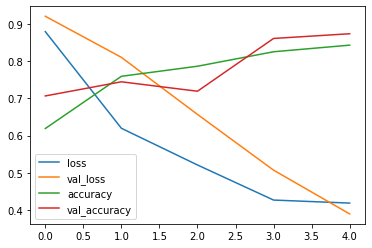

In [36]:
earlyStop = keras.callbacks.EarlyStopping(patience=60) 
best_model = keras.callbacks.ModelCheckpoint(filepath='best_model.h5', save_best_only=True) 

with tf.device('/cpu:0'):
    history = incept_model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test), callbacks=[earlyStop, best_model]) 

hist = history.history

plt.plot(hist['loss'], label=  'loss')
plt.plot(hist['val_loss'], label = 'val_loss')
plt.plot(hist['sparse_categorical_accuracy'], label='accuracy')
plt.plot(hist['val_sparse_categorical_accuracy'], label='val_accuracy')
plt.legend()

incept_model.evaluate(x=x_test, y = y_test, batch_size=32, verbose=1)


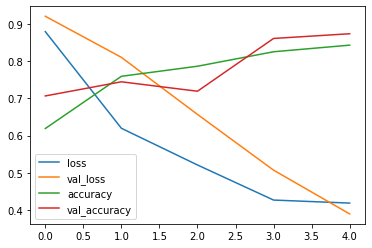

In [37]:
hist = history.history

plt.plot(hist['loss'], label=  'loss')
plt.plot(hist['val_loss'], label = 'val_loss')
plt.plot(hist['sparse_categorical_accuracy'], label='accuracy')
plt.plot(hist['val_sparse_categorical_accuracy'], label='val_accuracy')
plt.legend()